In [5]:
import numpy as np
import cv2
import os
import IPython

images = os.listdir("Images_cali/")

In [6]:
def show_image(image):
    _,ret = cv2.imencode('.jpg', image) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

0088.jpg

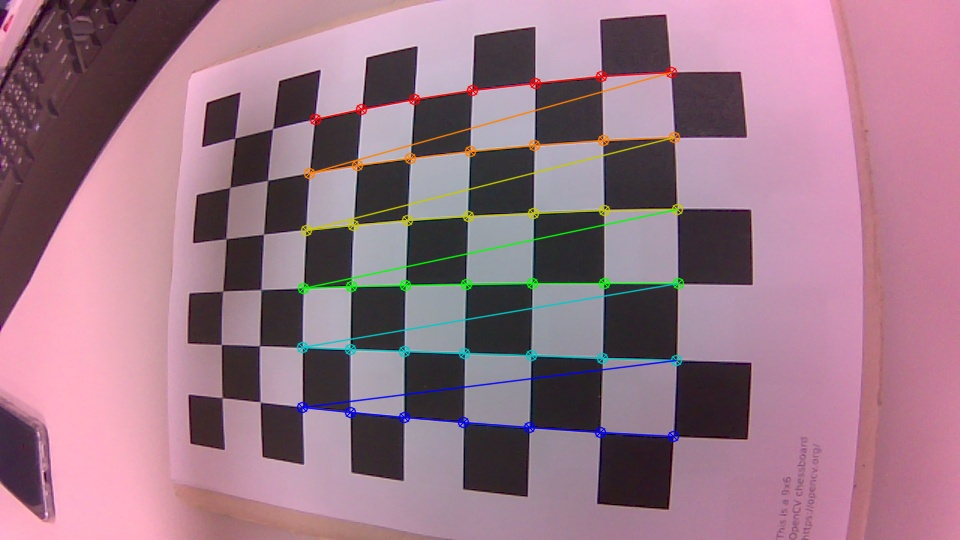

0089.jpg

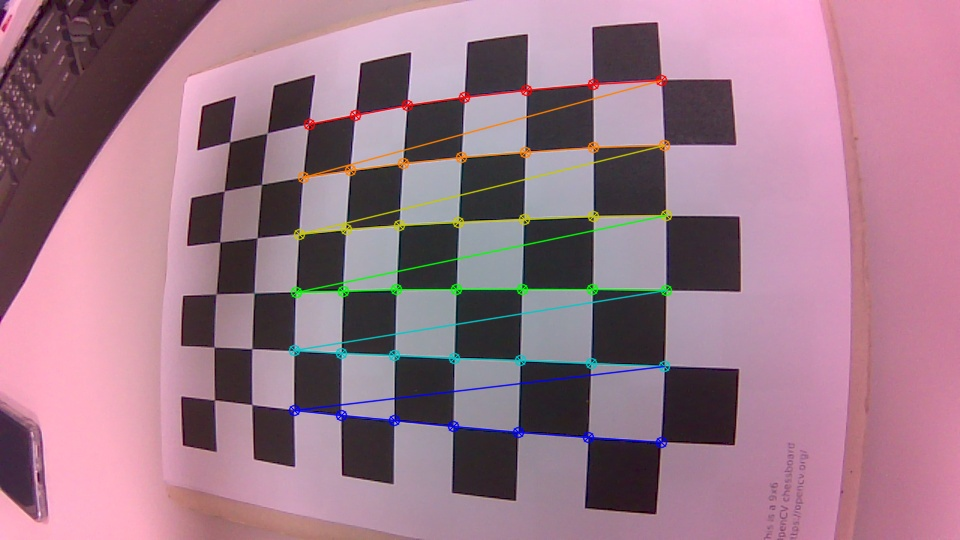

0090.jpg

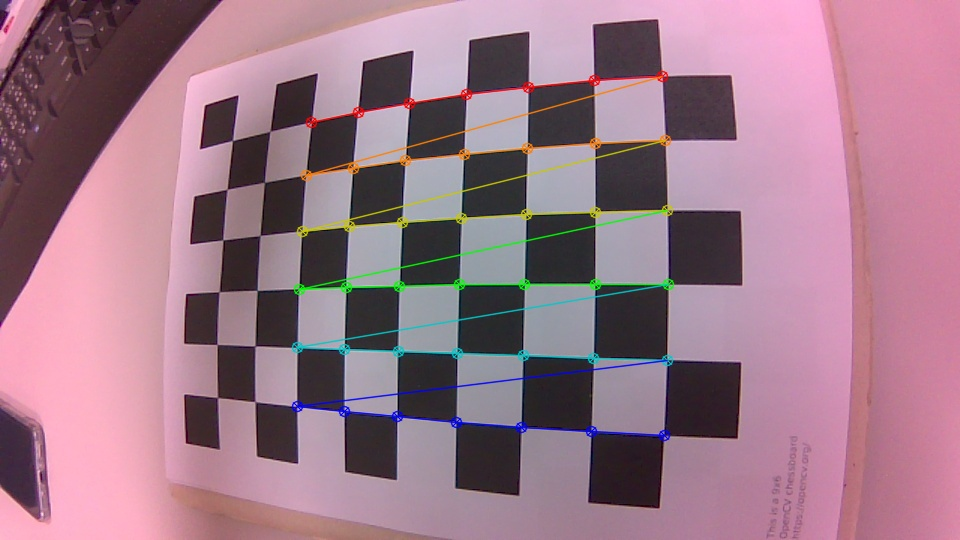

0092.jpg

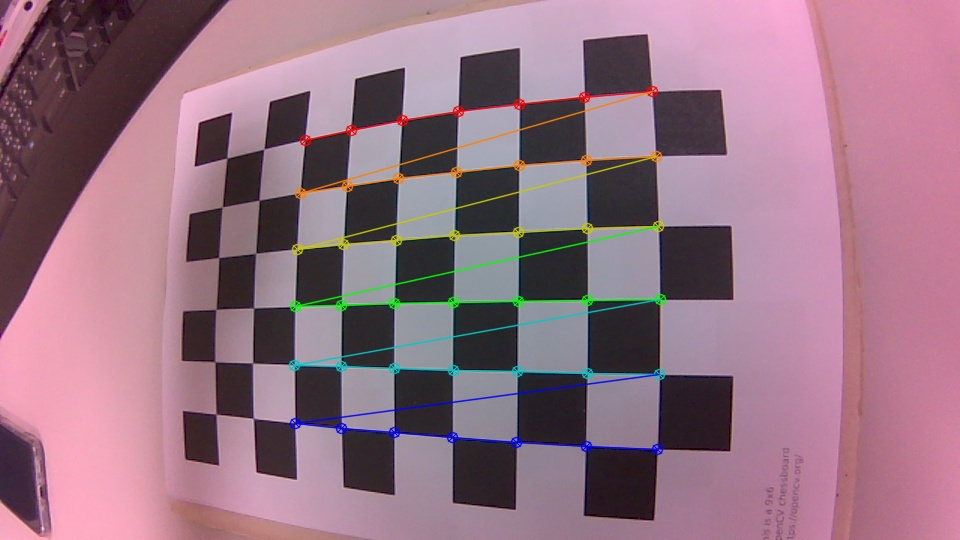

0111.jpg

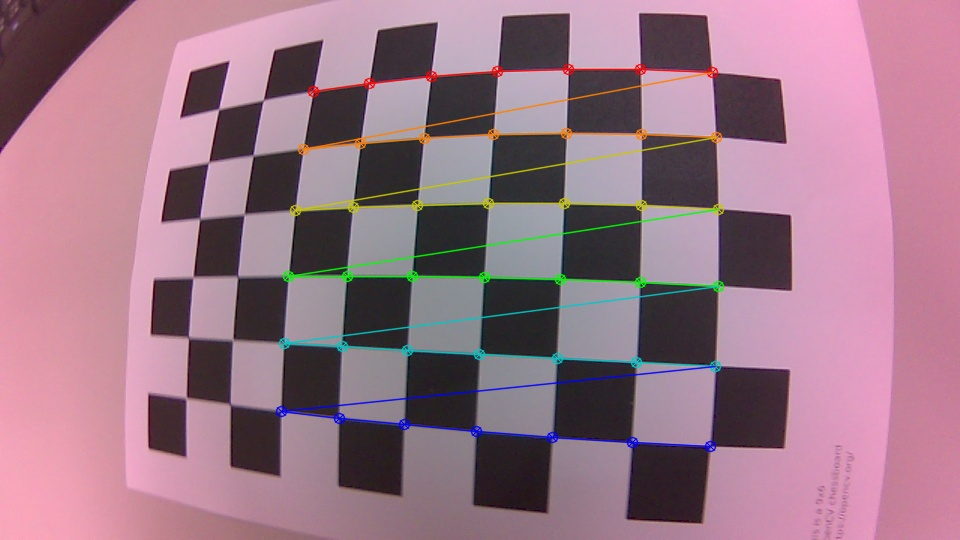

0195.jpg

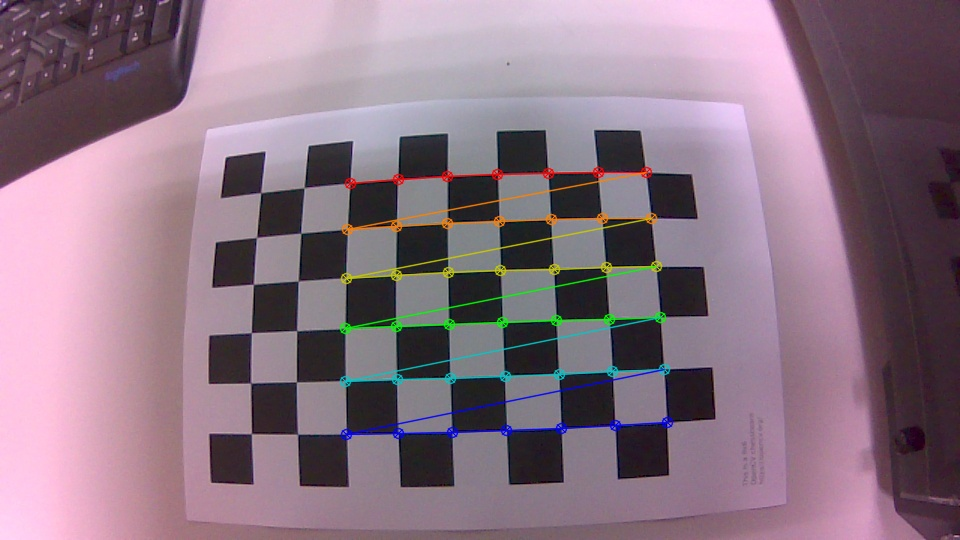

0196.jpg

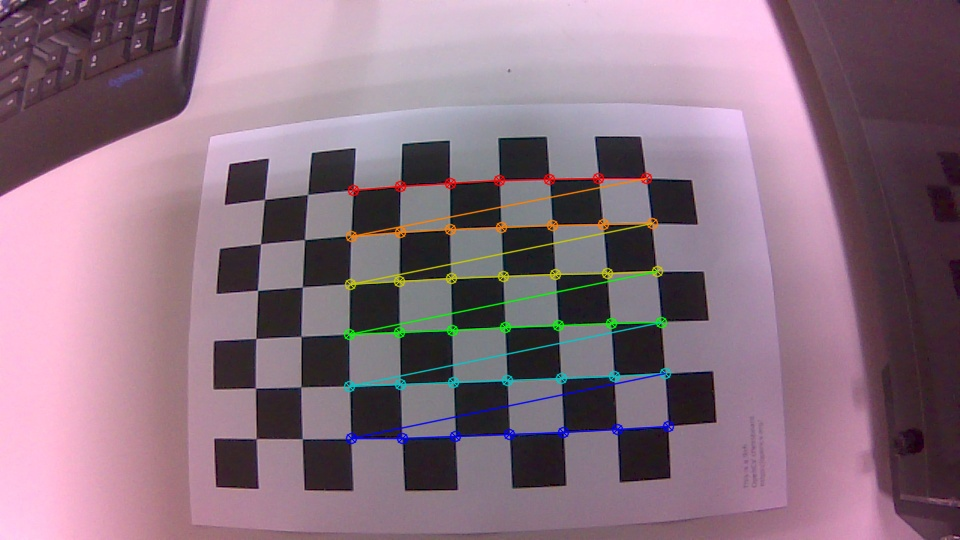

0217.jpg

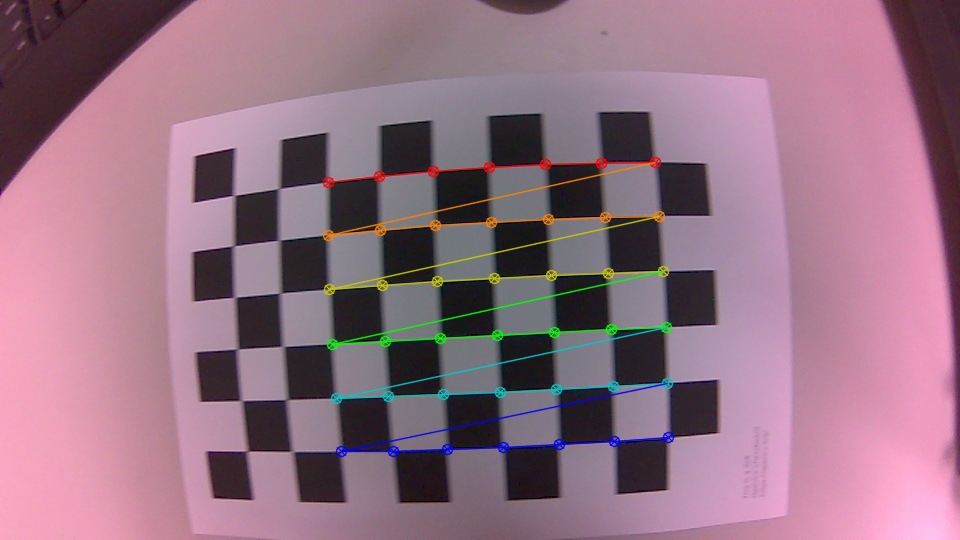

0227.jpg

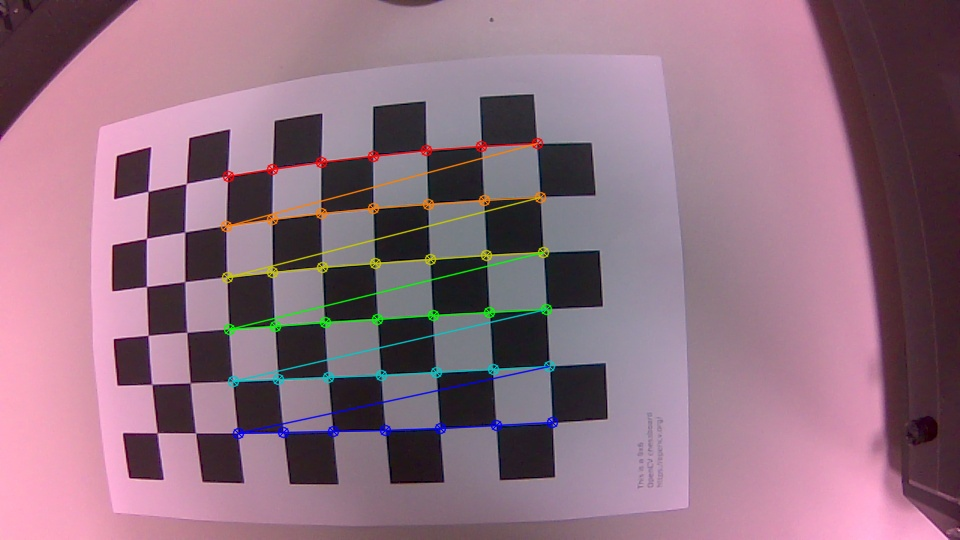

02271.jpg

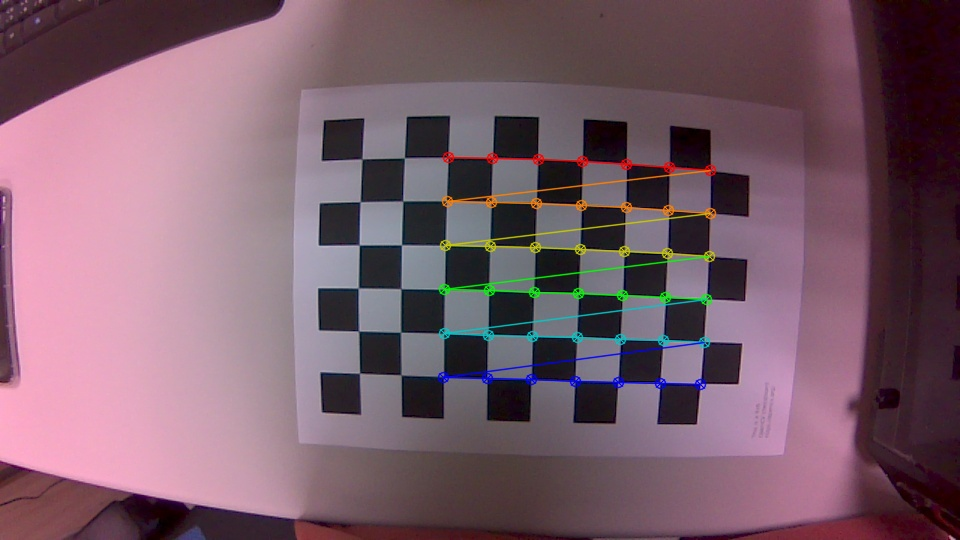

0228.jpg

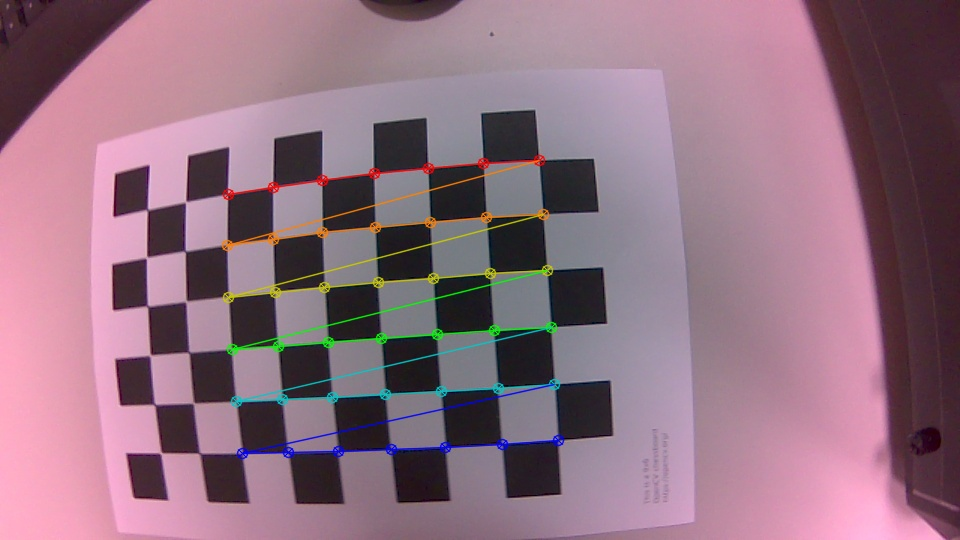

0231.jpg

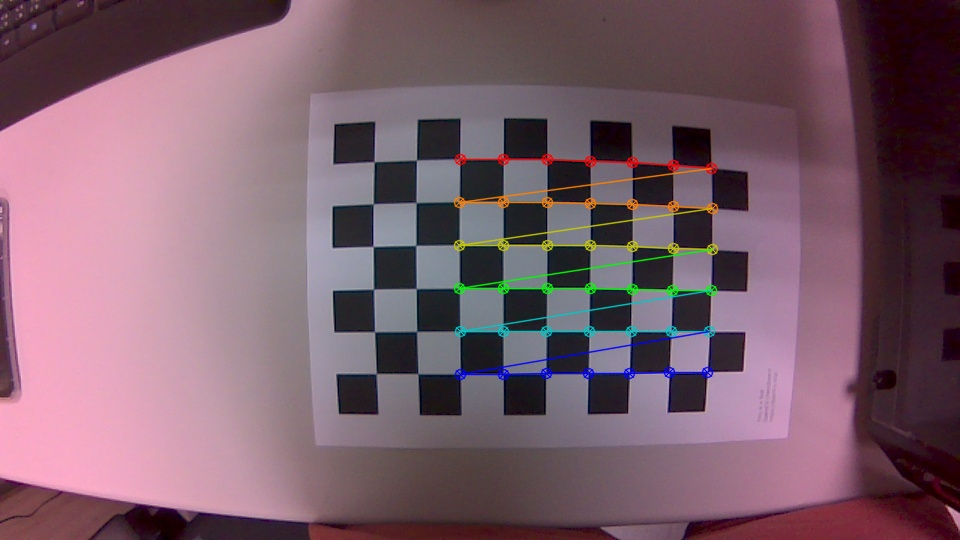

0233.jpg

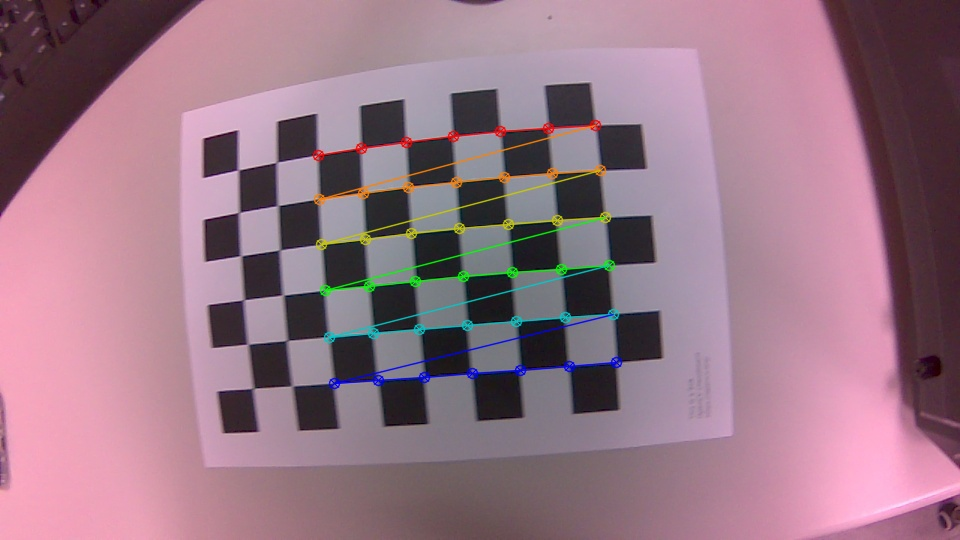

0234.jpg

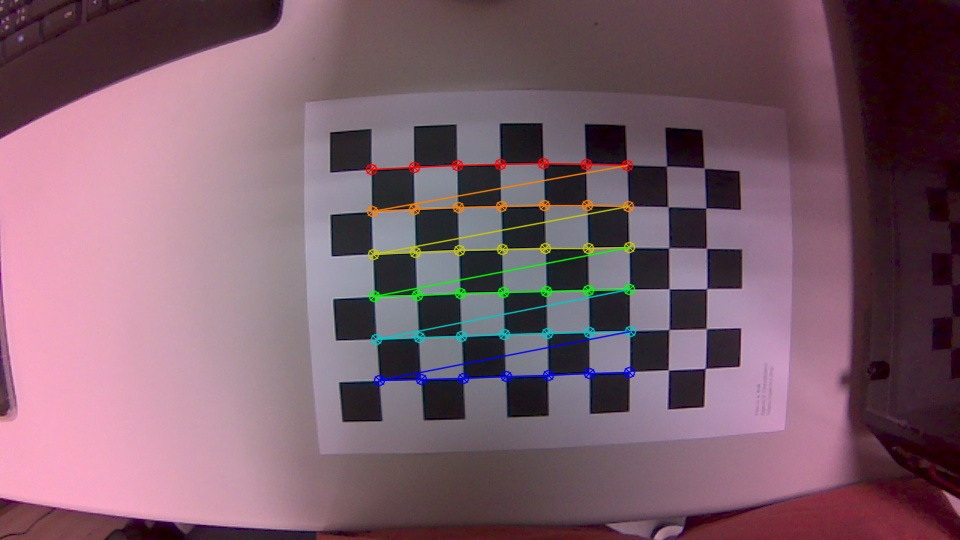

0248.jpg

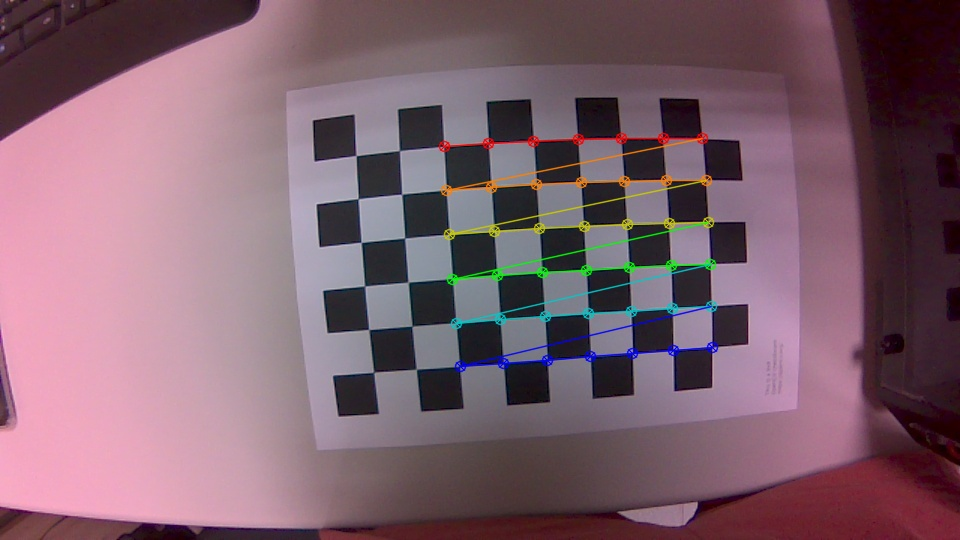

0256.jpg

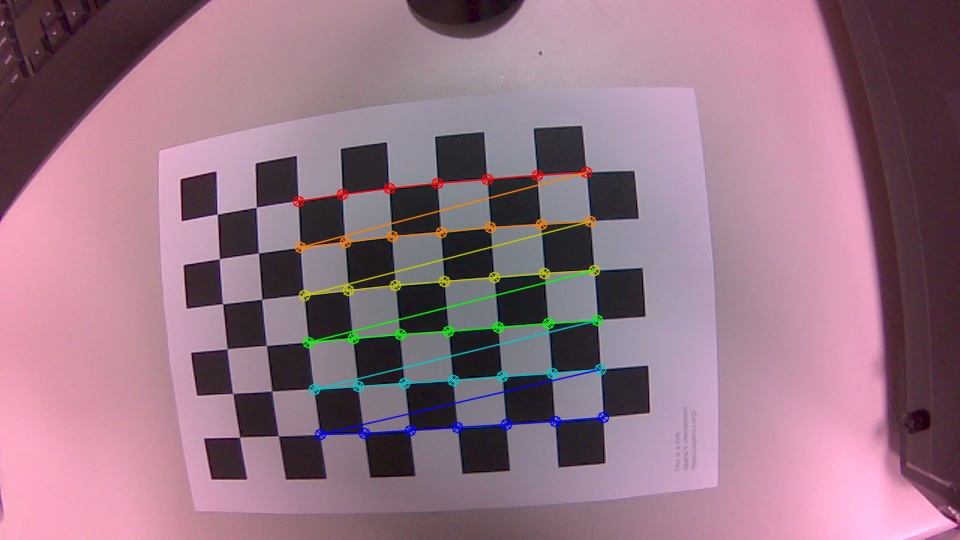

0257.jpg

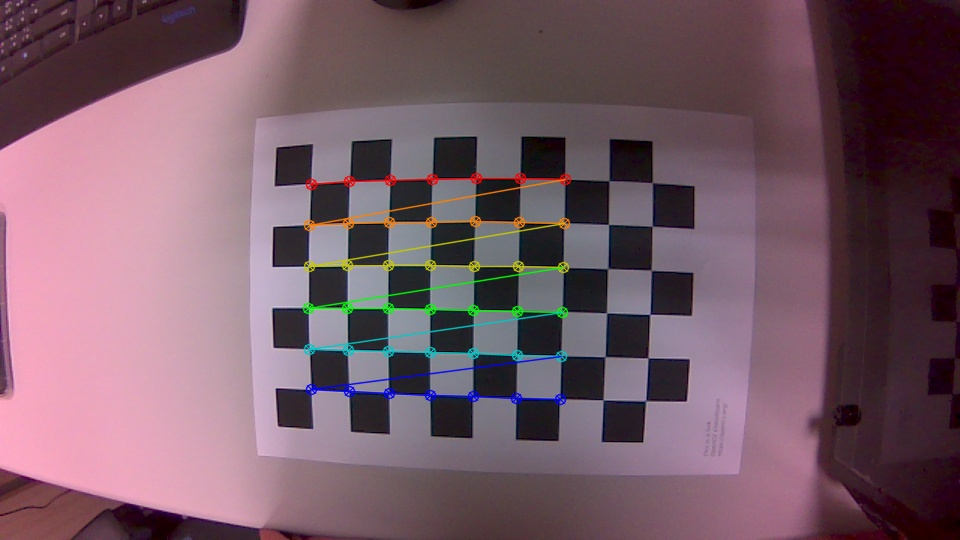

0258.jpg

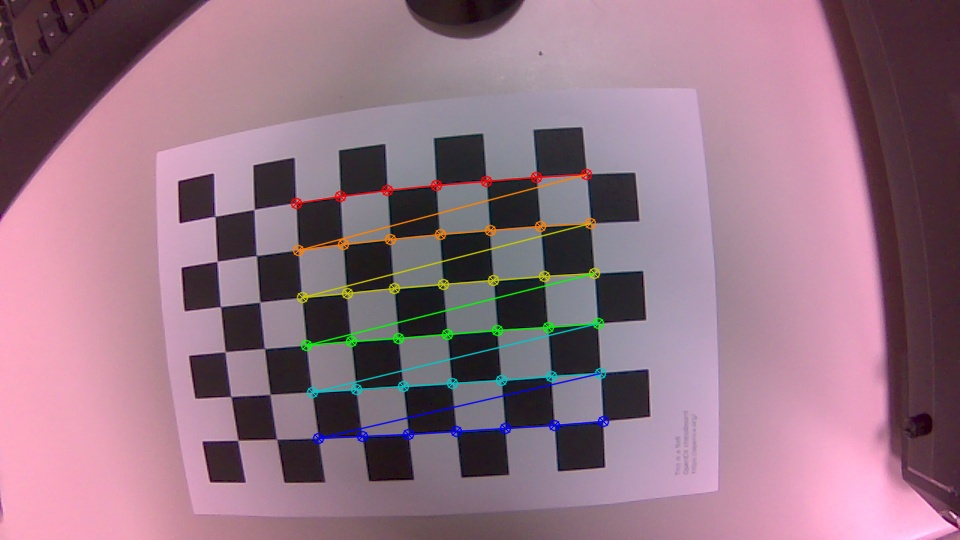

0259.jpg

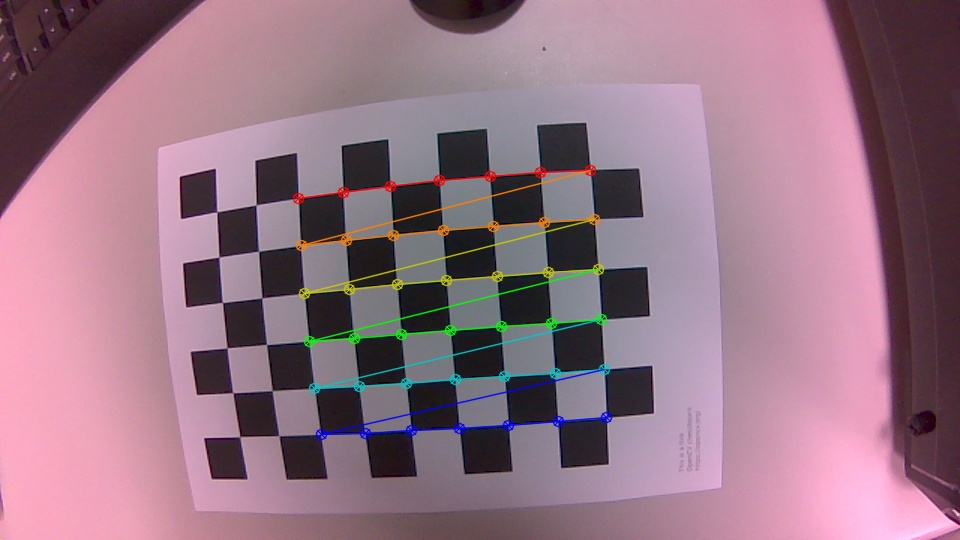

0266.jpg

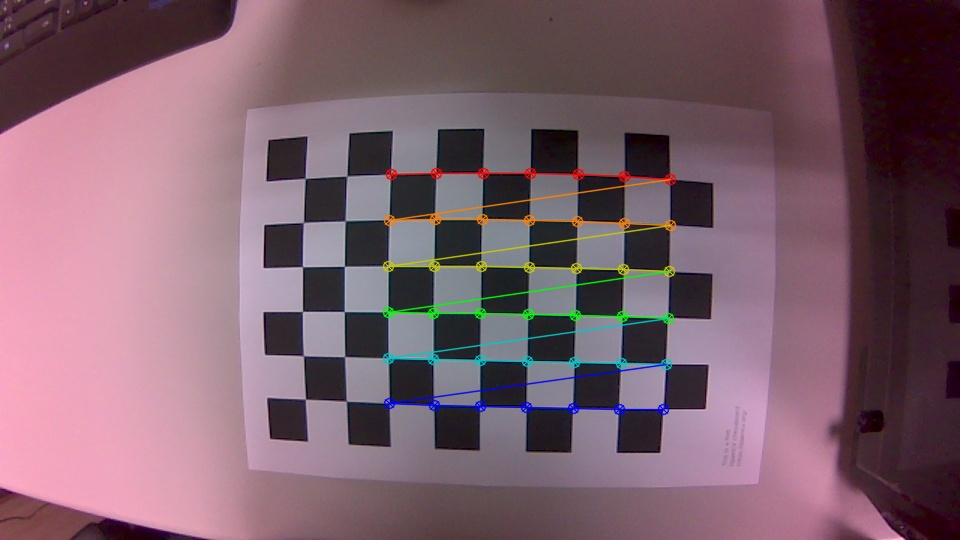

0268.jpg

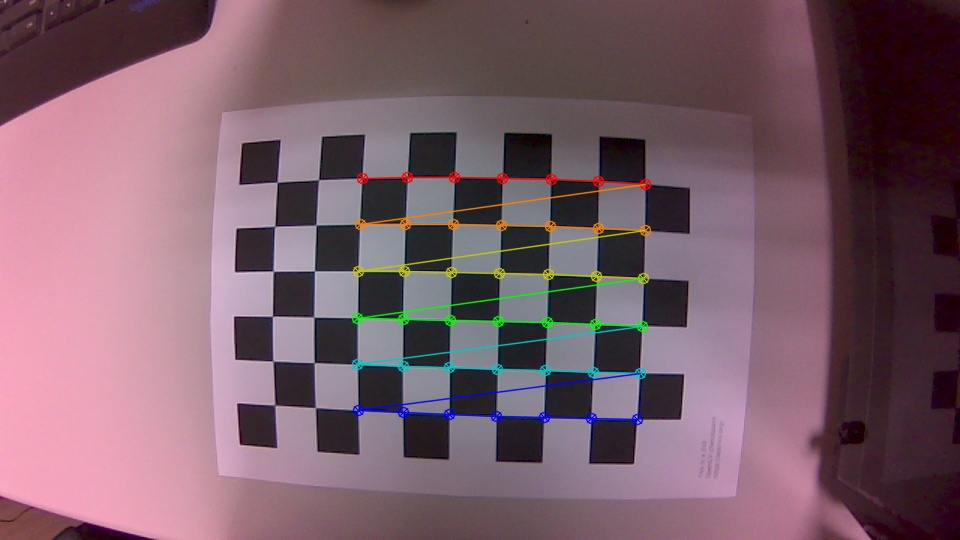

0298.jpg

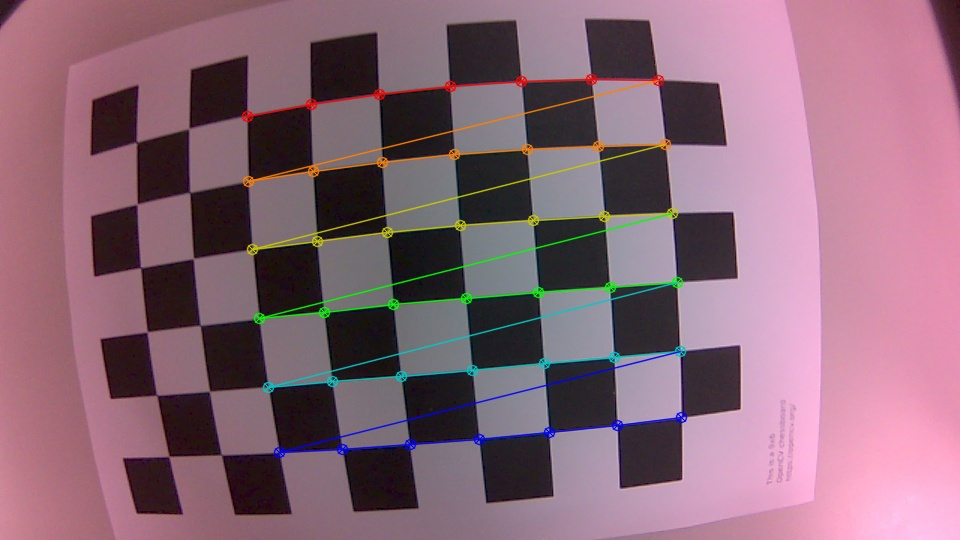

0301.jpg

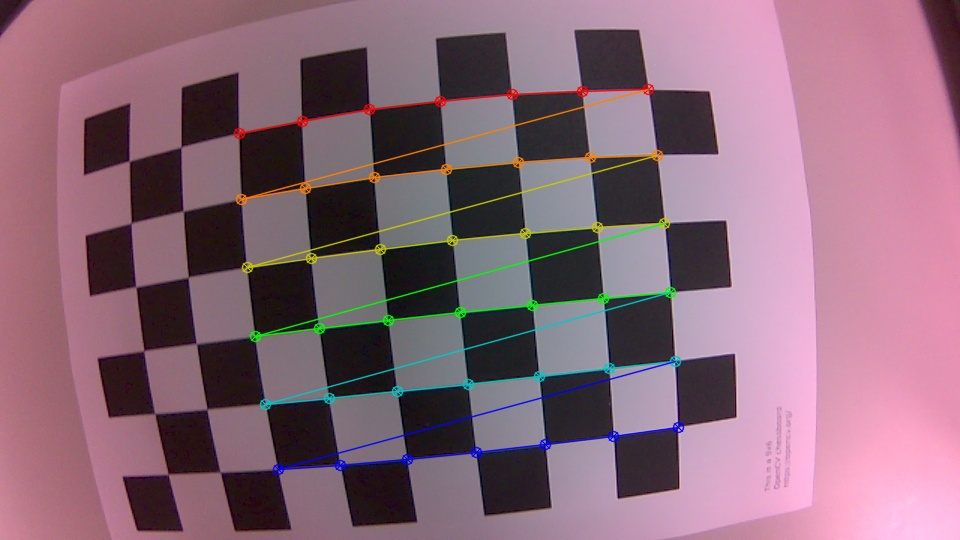

0362.jpg

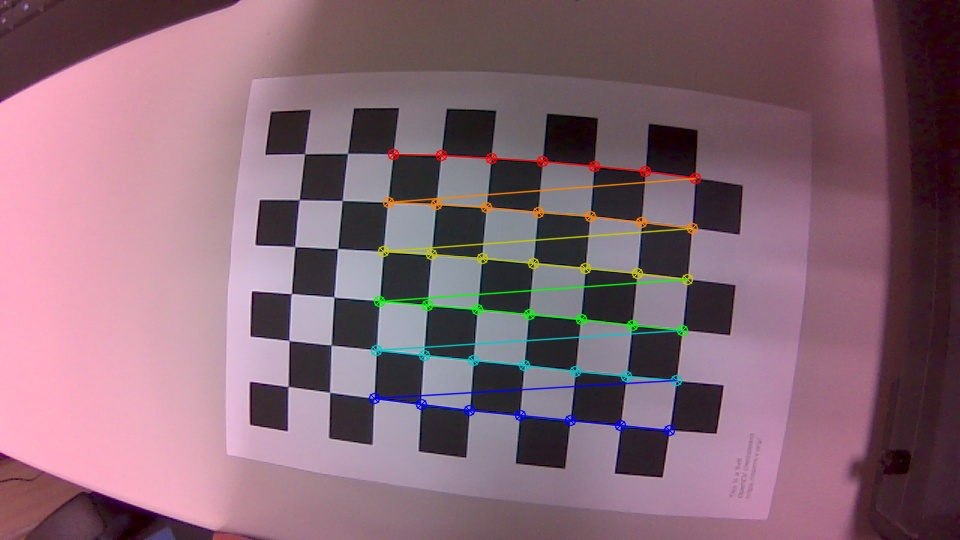

0371.jpg

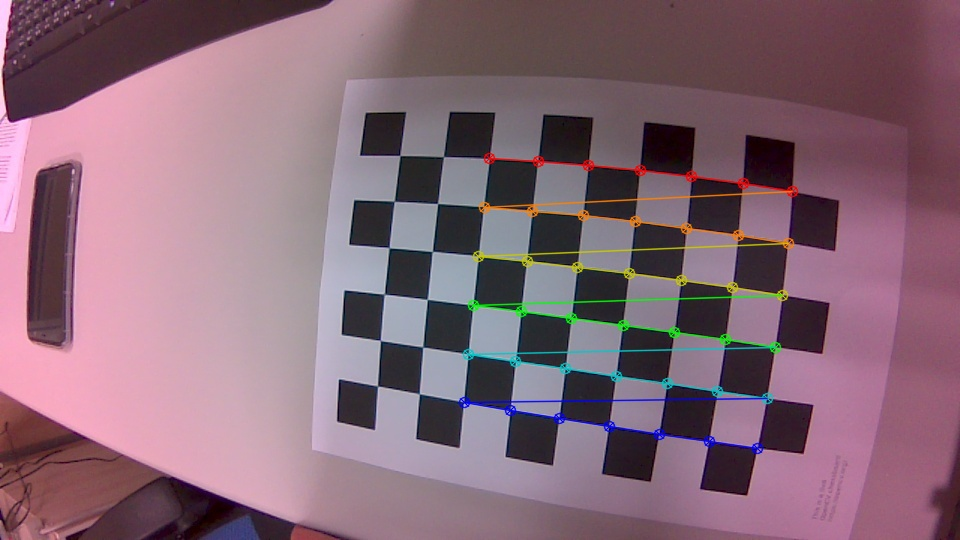

0376.jpg

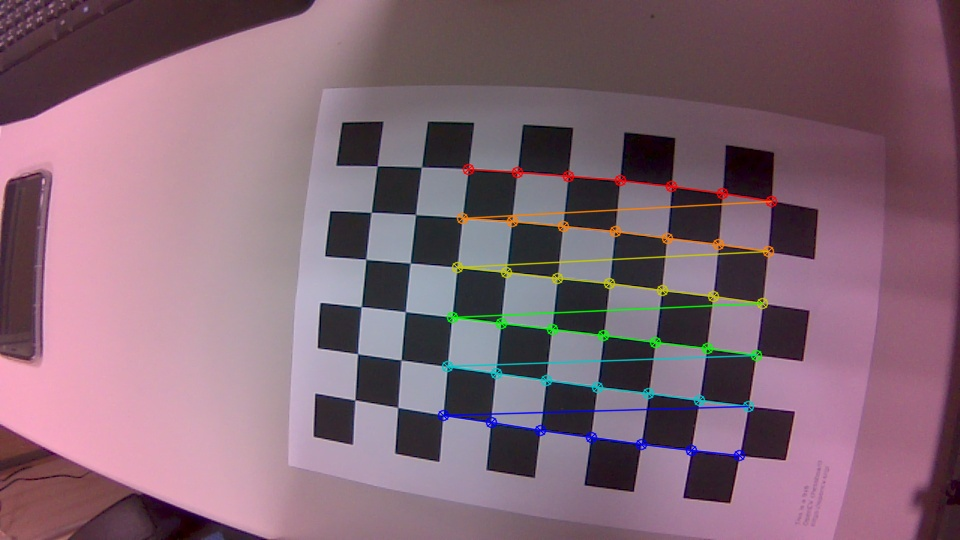

0379.jpg

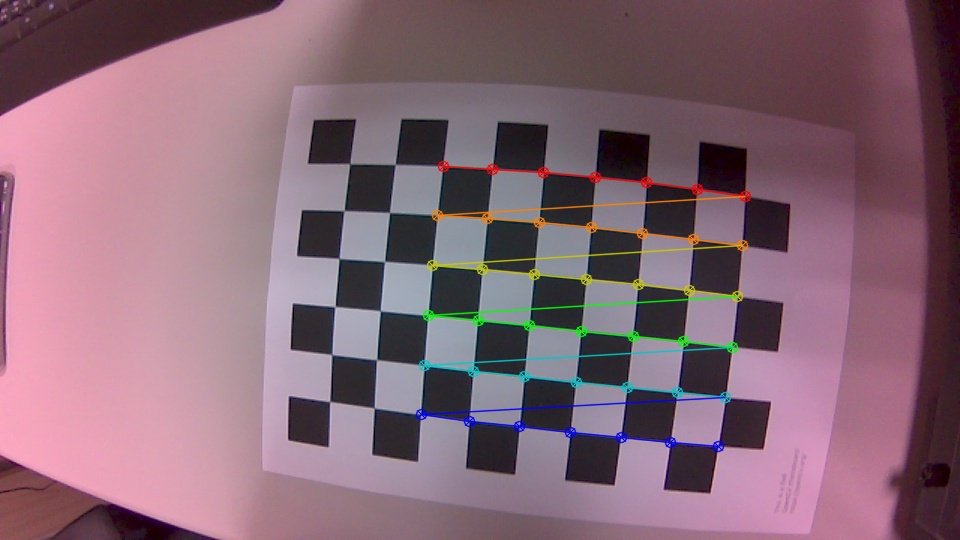

0433.jpg

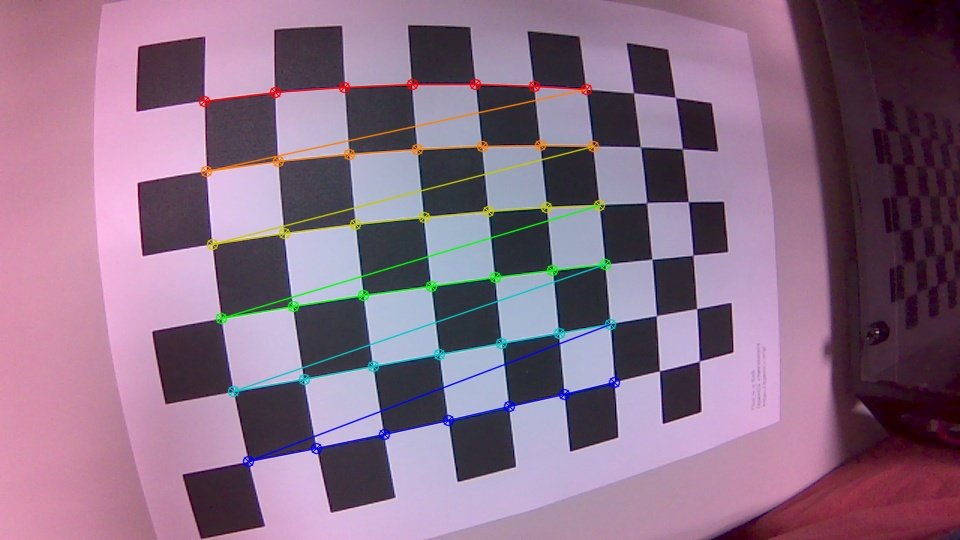

04331.jpg

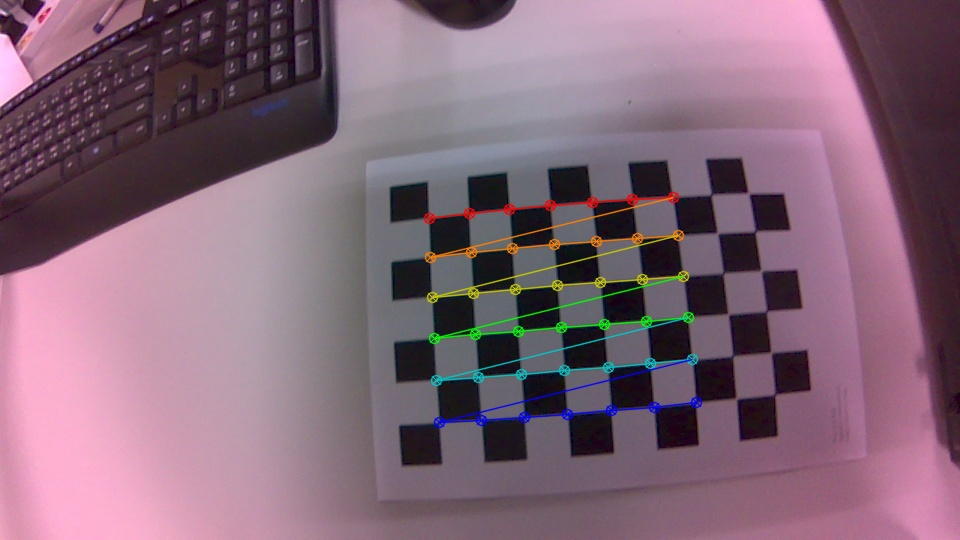

0435.jpg

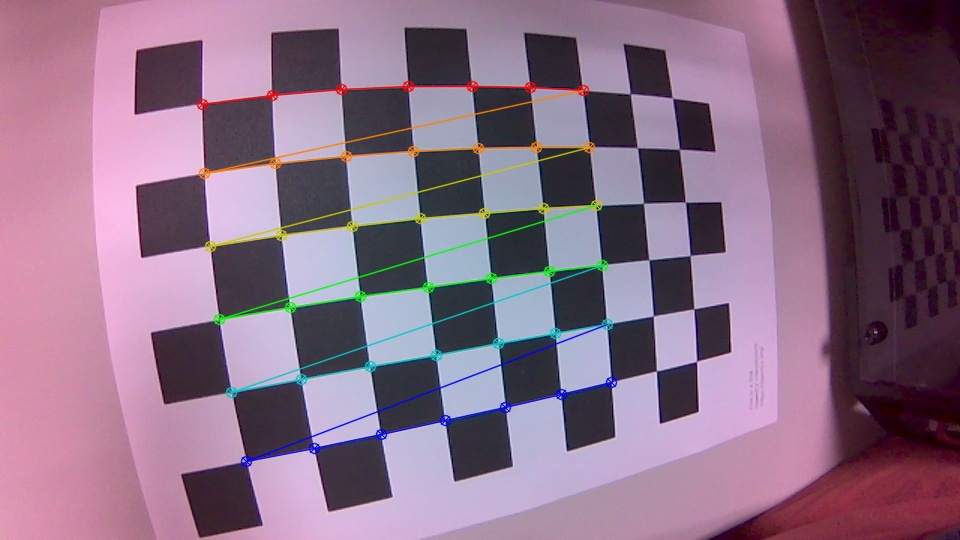

0437.jpg

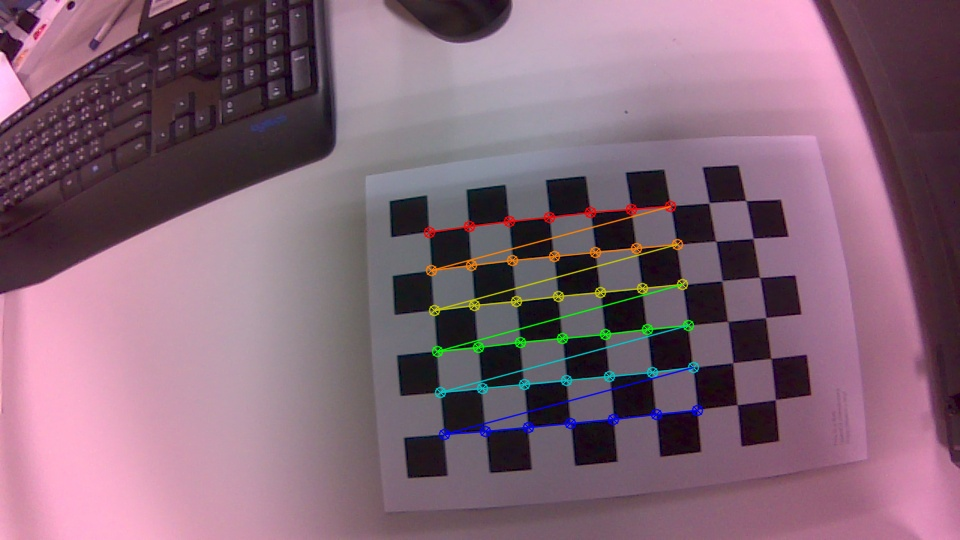

0438.jpg

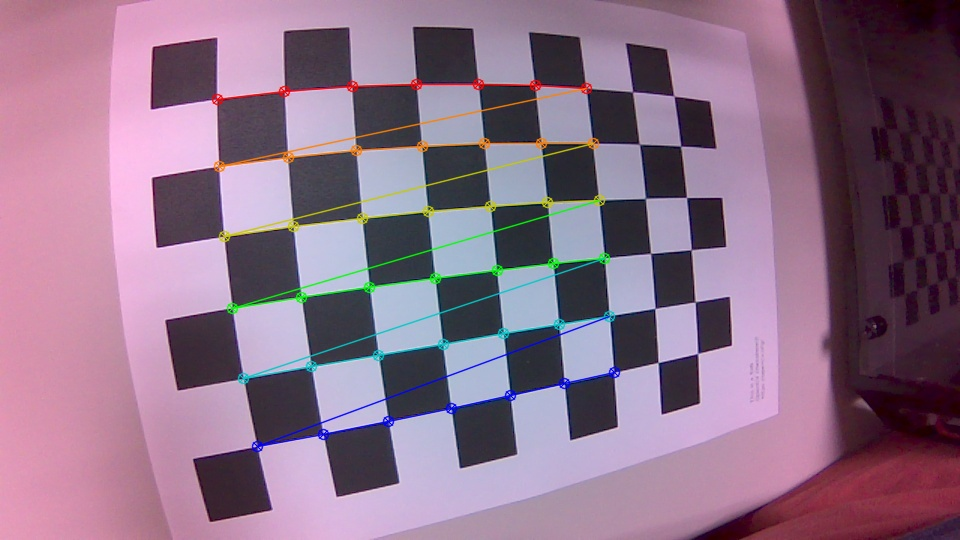

0439.jpg

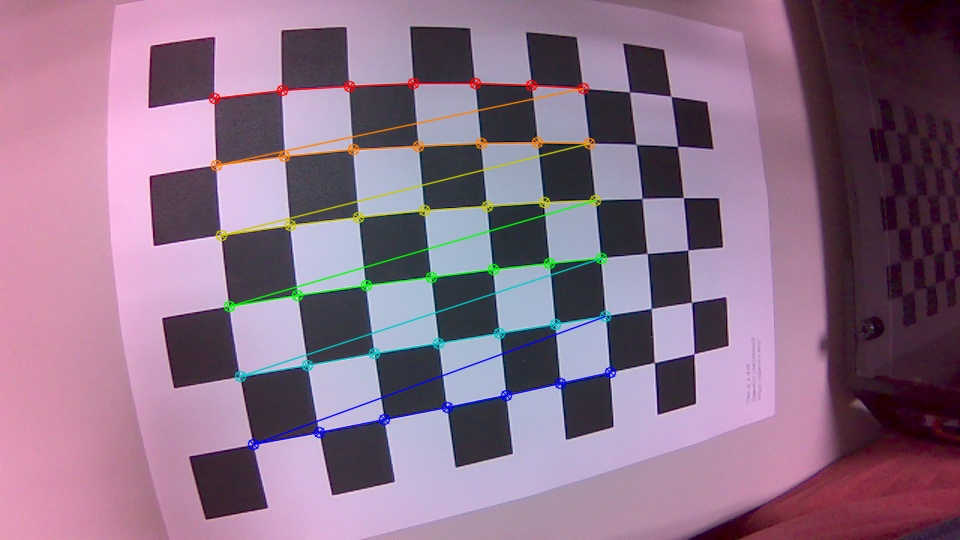

0440.jpg

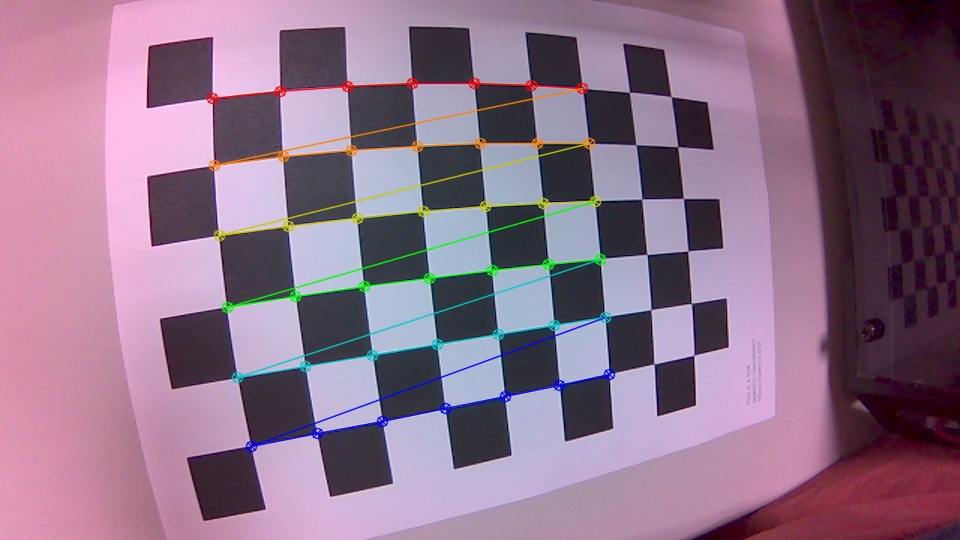

In [7]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in images:
    if fname.split(".")[-1] != "jpg":
        continue
    print("\r" + fname, end="")
    img = cv2.imread("Images_cali/" + fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        show_image(img)

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
np.savez_compressed('camera.npz', ret=ret, mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)
image_folder = "Images_undist/"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

for fname in images:
    if fname.split(".")[-1] != "jpg":
        continue
    
    img = cv2.imread("Images_cali/" + fname)
    h,  w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    print(fname, ", ROI:", roi)
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # crop the image
    x,y,w,h = roi
    #dst = dst[y:y+h, x:x+w]
    cv2.imwrite(image_folder+fname,dst)

0088.jpg , ROI: (52, 101, 707, 374)
0089.jpg , ROI: (52, 101, 707, 374)
0090.jpg , ROI: (52, 101, 707, 374)
0092.jpg , ROI: (52, 101, 707, 374)
0111.jpg , ROI: (52, 101, 707, 374)
0195.jpg , ROI: (52, 101, 707, 374)
0196.jpg , ROI: (52, 101, 707, 374)
0217.jpg , ROI: (52, 101, 707, 374)
0227.jpg , ROI: (52, 101, 707, 374)
02271.jpg , ROI: (52, 101, 707, 374)
0228.jpg , ROI: (52, 101, 707, 374)
0231.jpg , ROI: (52, 101, 707, 374)
0233.jpg , ROI: (52, 101, 707, 374)
0234.jpg , ROI: (52, 101, 707, 374)
0248.jpg , ROI: (52, 101, 707, 374)
0256.jpg , ROI: (52, 101, 707, 374)
0257.jpg , ROI: (52, 101, 707, 374)
0258.jpg , ROI: (52, 101, 707, 374)
0259.jpg , ROI: (52, 101, 707, 374)
0266.jpg , ROI: (52, 101, 707, 374)
0268.jpg , ROI: (52, 101, 707, 374)
0298.jpg , ROI: (52, 101, 707, 374)
0301.jpg , ROI: (52, 101, 707, 374)
0362.jpg , ROI: (52, 101, 707, 374)
0371.jpg , ROI: (52, 101, 707, 374)
0376.jpg , ROI: (52, 101, 707, 374)
0379.jpg , ROI: (52, 101, 707, 374)
0433.jpg , ROI: (52, 101, 7